**In this ipynb I have tried to use difference between various eegs as a feature and tried some models on it.**
***The data used in this file is same as that of EDA and FE notebook where I have created these features and took care of data imbalance and normalization.***

In [ ]:
# mounting the drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Loading the stored data.
import joblib
train_n=joblib.load('/content/drive/My Drive/train_data.pkl')
y=joblib.load('/content/drive/My Drive/y.pkl')

In [ ]:
# Importing the required libraries.
import warnings
import itertools
import numpy as np 
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, log_loss
import dask.dataframe as dd
import dask
import gc

warnings.filterwarnings(action='ignore')
sns.set_style('whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# This is mentioned in EDA notebook its used to convert the datatypes\
# of all the features into desired datatypes.
def gc():
    print(gc.collect())

dtypes = {"crew": "int8",
          "experiment": "category",
          "time": "float32",
          "seat": "int8",
          "eeg_fp1": "float32",
          "eeg_f7": "float32",
          "eeg_f8": "float32",
          "eeg_t4": "float32",
          "eeg_t6": "float32",
          "eeg_t5": "float32",
          "eeg_t3": "float32",
          "eeg_fp2": "float32",
          "eeg_o1": "float32",
          "eeg_p3": "float32",
          "eeg_pz": "float32",
          "eeg_f3": "float32",
          "eeg_fz": "float32",
          "eeg_f4": "float32",
          "eeg_c4": "float32",
          "eeg_p4": "float32",
          "eeg_poz": "float32",
          "eeg_c3": "float32",
          "eeg_cz": "float32",
          "eeg_o2": "float32",
          "ecg": "float32",
          "r": "float32",
          "gsr": "float32",
          "event": "category",
         }

import matplotlib.pyplot as plt
import itertools


In [ ]:
# Used to split the data into train and cross_validation
# Here I am keeping the cross_validation size only 20% and train data size as 80%.
from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv = train_test_split(train_n, y, test_size=0.2,random_state = 40)

In [ ]:
# Checking the shapes of train and cv data
print(X_train.shape)
print(X_cv.shape)
print(y_train.shape)
print(y_cv.shape)

(6068506, 25)
(1517127, 25)
(6068506, 1)
(1517127, 1)


# **Naive Bayes**

# Key features of naive bayes-

*   Naive bayes works fairly well if some of the features if not all are dependent on each other
*   It works well for high dimensional data
*   works well with categorical features
*   Naive bayes is not used very well when numerical features are there.
*   Super interpretable
*   Runtime Complexity is very low. Runtime space complexity is also very low.Good for low latency.
*   We can easily overfit if we dont do laplace smoothing.




In [ ]:
# Note that multinomial naive bayes dont take negative values as input\
# So I have already normalized it before using it.
## Using the RandomizedSearchCV for hyperparameter tuning.
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV 
param_dist = {"alpha" :[0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1]} 
nb = MultinomialNB()
rsc = RandomizedSearchCV(nb,param_dist,cv=5,verbose=500)
rsc.fit(X_train,y_train)
print("Tuned Multinomial Niave Bayes Parameters: {}".format(rsc.best_params_)) 
print("Best score is {}".format(rsc.best_score_)) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] alpha=1e-07 .....................................................
[CV] ......................... alpha=1e-07, score=0.427, total=   2.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[CV] alpha=1e-07 .....................................................
[CV] ......................... alpha=1e-07, score=0.427, total=   1.8s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s
[CV] alpha=1e-07 .....................................................
[CV] ......................... alpha=1e-07, score=0.424, total=   1.8s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.8s remaining:    0.0s
[CV] alpha=1e-07 .....................................................
[CV] ......................... alpha=1e-07, score=0.427, total=   1.8s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

In [ ]:
pred = rsc.predict_proba(X_cv)

In [ ]:
round(log_loss(y_cv,pred),3)

1.173

# Summary For Naive Bayes-


*   We have 25 dimensions in our train data so dimesionality was not a very big problem.
*   The optimum value of alpha hyperparameter after tuning was found out to be 1e-07.
*   The multiclass log-loss for naive bayes turned out to be 1.173 on cross validation dataset.




# ***Decision Tree***

# Key features of Decision Trees-


---




*   Imbalance data must be balanced.Because it will impact entropy calculations.
*   For large dimesionality it doesnt work well because for each feature we have to find the entropy. So training time increases.Avoid OneHotEncoding.
*   Works well on numerical data but not that well on categorical data.
*   Super Interpretable just by using the reduction in the entropy.


In [ ]:
# Using the RandomizedSearchCV for hyperparameter tuning.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 
param_dist = {"max_depth" : [10,100,200], 
              "criterion" : ['gini', 'entropy'],
              "random_state" : [40],
              "max_features" : ['auto'],
              "max_leaf_nodes" : [10,100,200]
              } 
dtc = DecisionTreeClassifier()
rsc = RandomizedSearchCV(dtc,param_dist,cv=3,verbose=500)
rsc.fit(X_train,y_train)
print("Tuned Decision Tree Parameters: {}".format(rsc.best_params_)) 
print("Best score is {}".format(rsc.best_score_)) 

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] random_state=40, max_leaf_nodes=200, max_features=auto, max_depth=200, criterion=entropy 
[CV]  random_state=40, max_leaf_nodes=200, max_features=auto, max_depth=200, criterion=entropy, score=0.739, total=  49.4s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   49.4s remaining:    0.0s
[CV] random_state=40, max_leaf_nodes=200, max_features=auto, max_depth=200, criterion=entropy 
[CV]  random_state=40, max_leaf_nodes=200, max_features=auto, max_depth=200, criterion=entropy, score=0.736, total=  51.8s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s
[CV] random_state=40, max_leaf_nodes=200, max_features=auto, max_depth=200, criterion=entropy 
[CV]  random_state=40, max_leaf_nodes=200, max_features=auto, max_depth=200, criterion=entropy, score=0.745, total=  52.6s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

So as we can see from this hyperparameter tuning we can see that the  max_leaf_nodes=200 and max_depth=200 and criterion as entropy . But this was the max value provided so there might be a chance that this can be even better if we further increase these two parameters ahead so lets try that out by doing hyperparameter tuning again with some different values.

In [ ]:
param_dist = {"max_depth" : [200,500,1000], 
              "criterion" : ['entropy'],
              "random_state" : [40],
              "max_features" : ['auto'],
              "max_leaf_nodes" : [200,500,1000]
              } 
dtc = DecisionTreeClassifier()
rsc = RandomizedSearchCV(dtc,param_dist,cv=2,verbose=500)
rsc.fit(X_train,y_train)
print("Tuned Decision Tree Parameters: {}".format(rsc.best_params_)) 
print("Best score is {}".format(rsc.best_score_)) 

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] random_state=40, max_leaf_nodes=200, max_features=auto, max_depth=200, criterion=entropy 
[CV]  random_state=40, max_leaf_nodes=200, max_features=auto, max_depth=200, criterion=entropy, score=0.740, total=  39.6s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.6s remaining:    0.0s
[CV] random_state=40, max_leaf_nodes=200, max_features=auto, max_depth=200, criterion=entropy 
[CV]  random_state=40, max_leaf_nodes=200, max_features=auto, max_depth=200, criterion=entropy, score=0.749, total=  40.8s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s
[CV] random_state=40, max_leaf_nodes=500, max_features=auto, max_depth=200, criterion=entropy 
[CV]  random_state=40, max_leaf_nodes=500, max_features=auto, max_depth=200, criterion=entropy, score=0.794, total=  46.3s
[Parallel(n_jobs=1)]: Done   3 out of   3 | e

So as we can see the max depth is 200.But max_leaf_nodes can be even better so lets traget that now

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 
param_dist = {"max_depth" : [200], 
              "criterion" : ['entropy'],
              "random_state" : [40],
              "max_features" : ['auto'],
              "max_leaf_nodes" : [1000,1500,2000]
              } 
dtc = DecisionTreeClassifier()
rsc = RandomizedSearchCV(dtc,param_dist,cv=2,verbose=500)
rsc.fit(X_train,y_train)
print("Tuned Decision Tree Parameters: {}".format(rsc.best_params_)) 
print("Best score is {}".format(rsc.best_score_)) 

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] random_state=40, max_leaf_nodes=1000, max_features=auto, max_depth=200, criterion=entropy 
[CV]  random_state=40, max_leaf_nodes=1000, max_features=auto, max_depth=200, criterion=entropy, score=0.831, total=  49.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   49.3s remaining:    0.0s
[CV] random_state=40, max_leaf_nodes=1000, max_features=auto, max_depth=200, criterion=entropy 
[CV]  random_state=40, max_leaf_nodes=1000, max_features=auto, max_depth=200, criterion=entropy, score=0.845, total=  49.9s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s
[CV] random_state=40, max_leaf_nodes=1500, max_features=auto, max_depth=200, criterion=entropy 
[CV]  random_state=40, max_leaf_nodes=1500, max_features=auto, max_depth=200, criterion=entropy, score=0.852, total=  51.4s
[Parallel(n_jobs=1)]: Done   3 out of   

In [ ]:
# Creating model with best paramters.
clf = DecisionTreeClassifier(max_depth = 200, criterion= 'entropy',max_leaf_nodes = None, random_state = 40)
clf = clf.fit(X_train,y_train)

In [ ]:
# Directory adjustments
import os
os.chdir('/content/drive/My Drive')

In [ ]:
# Joblib is used to export the model/results 
import joblib 
joblib.dump(clf,'decision_tree.pkl')

['decision_tree.pkl']

In [ ]:
from sklearn.metrics import log_loss
pred = clf.predict_proba(X_cv)
print(log_loss(y_cv,pred))

0.3494794809124612


# Summary for Decision Tree -

---




*   Since our data has very few categorical features so we were not required to use OneHotEncoding.Since OHE was not used number of features were not very high.So we an expect good results from Decision trees.

---


*   List of hyperparameters used for tuning is as follows-
* max_depth - It is the depth of trees. If it is too high then model tends to overfit and if it is very low then model tends to underfit.
* criterion - two choices(gini impurity or entropy).From Hyperparamter tuning we found that entropy is the one which gave us better result.
* max_features- features to be considered for looking at best split.
* max_leaf_nodes - This trains the model with best feature first manner. That means for whichever feature the difference between entropy or gini value is max it is given more importance.
* random_state- controls randomness of estimator.


---
* The multiclass log loss which was found is 0.3494 which is significantly lower than the naive bayes.
* So based on this result we can try next ensemble tree based model which is randomforest.






# **Random Forest**

# Key features of Random Forest-

---
* It is a bagging technique based algorithm. Bagging techniques are used whenever we want to lower the variance and keep the bias unchanged.
* It uses decision trees as base learners, So basically it is collection of trees.
*It does the Decision Trees+ Bagging+ Column Sampling+aggregation. So as it has seen different variety of data the model gets less impacted by variance in data.So it reduces the variance impact.
*As the number of n_estimators increases the variance gets low and if n_estimators are low then it tends to overfit.
*Since it has decision tree as base model it works very similar to decision trees.

---
* We will use the tuned parameters of decision tree to find  n_estimators 



In [ ]:
# Using the RandomizedSearchCV for hyperparameter tuning.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV 
param_dist = {"n_estimators":[1,5,10],
              "max_depth" : [200], 
              "criterion" : ['entropy'],
              "random_state" : [40],
              "max_features" : ['auto'],
              } 
rfc = RandomForestClassifier()
rsc = RandomizedSearchCV(rfc,param_dist,cv=2,verbose=500)
rsc.fit(X_train,y_train)
print("Tuned Decision Tree Parameters: {}".format(rsc.best_params_)) 
print("Best score is {}".format(rsc.best_score_)) 

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] random_state=40, n_estimators=1, max_features=auto, max_depth=200, criterion=entropy 
[CV]  random_state=40, n_estimators=1, max_features=auto, max_depth=200, criterion=entropy, score=0.951, total=  50.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   50.0s remaining:    0.0s
[CV] random_state=40, n_estimators=1, max_features=auto, max_depth=200, criterion=entropy 
[CV]  random_state=40, n_estimators=1, max_features=auto, max_depth=200, criterion=entropy, score=0.952, total=  50.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s
[CV] random_state=40, n_estimators=5, max_features=auto, max_depth=200, criterion=entropy 
[CV]  random_state=40, n_estimators=5, max_features=auto, max_depth=200, criterion=entropy, score=0.979, total= 4.0min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.7min remaining

In [ ]:
# Fitting the model with optimum hyperparamter values
clf = RandomForestClassifier(n_estimators = 10,max_depth = 200, criterion= 'entropy', random_state = 40,max_features = 'auto')
clf = clf.fit(X_train,y_train)

In [ ]:
import os
os.chdir('/content/drive/My Drive')

In [ ]:
joblib.dump(clf,'random_forest.pkl')

['random_forest.pkl']

In [ ]:
pred = clf.predict_proba(X_cv)
from sklearn.metrics import log_loss
print(log_loss(y_cv,pred))

0.05912170634946324


# Summary Of Random Forest-


---




*   Random forest is an ensemble technique which reduces variance while keeping bias unimpacted.
*   The n_estimators paramter is the total number of trees used for the prediction. Optimum n_estimators were found out to be 10.
*   Since it reduces the variance it is expected that it will give better result than decision trees
*   Here we have reduced the multiclass log loss to 0.05912 which is very low as compared to that of decision tres.
*   This Random Forest is bagging technique but can we use boosting technique which can reduce bias while keeping the variance undisturbed?. One model to try is LightGBM.



# **LightGBM**

# Key features of LightGBM-


---


*   This is the model which is light version of XGBoost and basically implements Gradient Boosted Decision Trees.
*   LightGBM is boosting based algorithm.Boosting algorithms tend to lower the bias while keeping the variance unchanged.
*   Boosting based algorithms basically trains on pseudo residuals of loss function.
*   For this to compute the gradients of the function need to be calculated.It is computationally very expensive and takes long time to train.




In [ ]:
import lightgbm as lgb
params = {"objective" : "multiclass",
              "num_class": 4,
              "metric" : "multi_error",
              "num_leaves" : 30,
              "min_child_weight" : 50,
              "learning_rate" : 0.1,
              "bagging_fraction" : 0.7,
              "feature_fraction" : 0.7,
              "bagging_seed" : 420,
              "verbosity" : -1
             }

lg_train = lgb.Dataset(X_train,label=y_train)
lg_test = lgb.Dataset(X_cv,y_cv)
model = lgb.train(params, lg_train, 1000, valid_sets=[lg_test], early_stopping_rounds=50, verbose_eval=100)

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's multi_error: 0.0909904
[200]	valid_0's multi_error: 0.0685236
[300]	valid_0's multi_error: 0.0571356
[400]	valid_0's multi_error: 0.0505765
[500]	valid_0's multi_error: 0.0456712
[600]	valid_0's multi_error: 0.0423893
[700]	valid_0's multi_error: 0.0395827
[800]	valid_0's multi_error: 0.0374174
[900]	valid_0's multi_error: 0.0356463
[1000]	valid_0's multi_error: 0.0341237
Did not meet early stopping. Best iteration is:
[1000]	valid_0's multi_error: 0.0341237


In [ ]:
import os
os.chdir('/content/drive/My Drive/ML case study')
import joblib
joblib.dump(model,'lgb_models_from all_models_file.pkl')

['lgb_models_from all_models_file.pkl']

In [ ]:
0.1142

In [ ]:
pred_val = model.predict(X_cv, num_iteration= model.best_iteration )
print('multiclass log loss',round(log_loss(y_cv['event'].to_numpy(),pred_val),5))

multiclass log loss 0.10595


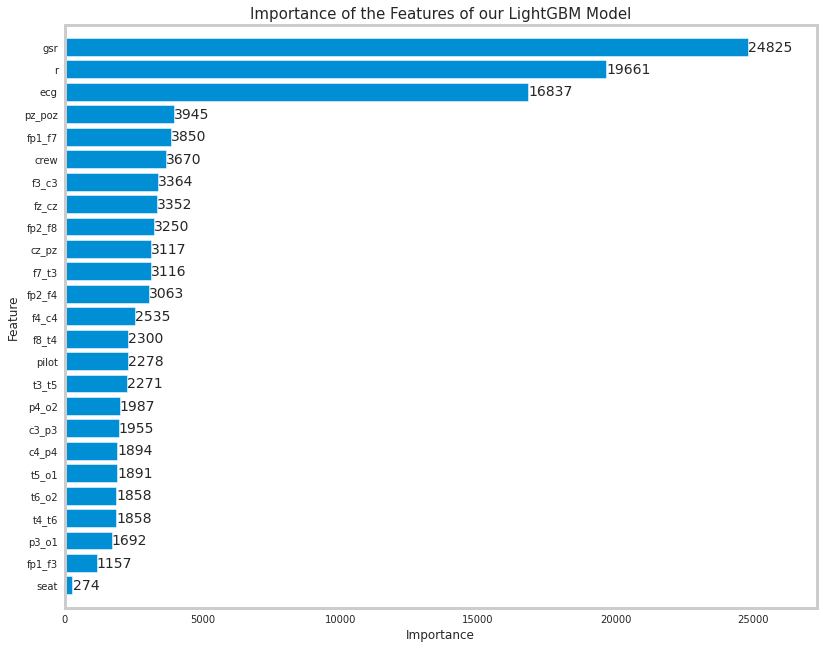

In [ ]:
#Checking out the Feature Importance of each feature in descending order.
fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(model, height=0.8, ax=ax)
ax.grid(False)
plt.ylabel('Feature', size=12)
plt.xlabel('Importance', size=12)
plt.title("Importance of the Features of our LightGBM Model", fontsize=15)
plt.show()

Normalized confusion matrix
[[9.40048031e-01 2.95104321e-03 5.37971785e-03 5.16212082e-02]
 [1.94359809e-02 9.79226697e-01 1.33732232e-03 0.00000000e+00]
 [8.65653908e-03 8.24432293e-04 9.90131060e-01 3.87968138e-04]
 [6.14425131e-02 0.00000000e+00 2.71409598e-03 9.35843391e-01]]


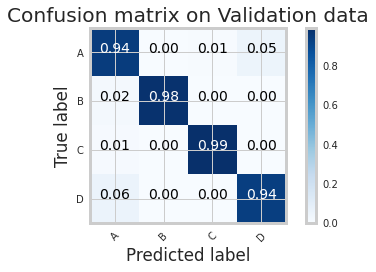

In [ ]:
conf_mat_val = confusion_matrix(np.argmax(pred_val, axis=1), y_cv.values)
plot_confusion_matrix(conf_mat_val, ["A", "B", "C", "D"], title='Confusion matrix on Validation data', normalize=True)

# Summary of LightGBM- 


*   There are too many hyperparamters to be tuned But the documentation for lightgbm has explaination for all of them https://lightgbm.readthedocs.io/en/latest/Parameters.html
*   We found that the multiclass log loss is found out to be 0.1143.
*   It is way to computationally expensive to hyperparameter tune this model so I have used few reference kernels and tuned model to get the results. I found one library which can be used for this HPT named optuna.
* We can see from the confusion matrix that it was able to classify event A(94%),B(98%),C(99%),D(94%).



# ***Support Vector Machine***

SVMs dont work very well when you have large datapoints. Here we have about 4 million points in train. But if we look at the application then we will realize that to know if pilot is not losing the sense or not getting distracted we need super low latency. But SVMs dont work well in low letancy requirements.So we should rather try logistic regression which is super fast algorithm.Even for fitting model for one set of parameters SVM was taking way to long (since data is to large and SVM needs to calculate distance for each point in that rbf kernel function, so it was taking it forever so I didnt Hyper Parameter Tune it.)

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import RandomizedSearchCV 
# param_dist = {"C":[0.001,0.01,0.1,1,10,100]} 
# svc = SVC()
# rsc = RandomizedSearchCV(svc,param_dist,cv=2,verbose=500,n_jobs=-1)
# rsc.fit(X_train,y_train)
# print("Tuned Decision Tree Parameters: {}".format(rsc.best_params_)) 
# print("Best score is {}".format(rsc.best_score_)) 

In [ ]:
# C = [0.01,0.1,1,10]
# from sklearn.svm import SVC
# from tqdm.auto import tqdm
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn.metrics import log_loss
# for c in tqdm(C):
#   print('value of c is:',c)
#   svm = SVC(C = c,kernel = 'rbf',decision_function_shape='ovo',)
#   clf = CalibratedClassifierCV(svm,method='sigmoid',cv=2)
#   clf = clf.fit(X_train.sample(50C = [0.01,0.1,1,10]
                               



# from sklearn.svm import SVC
# from tqdm.auto import tqdm
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn.metrics import log_loss
# for c in tqdm(C):
#   print('value of c is:',c)
#   svm = SVC(C = c,kernel = 'rbf',decision_function_shape='ovo',)
#   clf = CalibratedClassifierCV(svm,method='sigmoid',cv=2)
#   clf = clf.fit(X_train.sample(5000),y_train.sample(5000))
#   probs = clf.predict_proba(X_cv)
#   print(log_loss(y_cv,probs))00),y_train.sample(5000))
#   probs = clf.predict_proba(X_cv)
#   print(log_loss(y_cv,probs))

In [ ]:
# import os
# os.chdir('/content/drive/My Drive')
# import joblib
# joblib.dump(model,'SVC.pkl')

# **Logistic regression**


# Key features of Logistic Regression-


---




*   Logistic regression has very few HPT to tune so it works super fast.
*   It gives low latency since it has fewer HP to tune.
*   Logistic regression uses sigmoid function so we cant use that directly for multiclass classification. 

*  For that we use one vs rest method.






In [ ]:
from sklearn.linear_model import LogisticRegression
from tqdm.auto import tqdm
from sklearn.model_selection import RandomizedSearchCV 
# from sklearn.multiclass import OneVsRestClassifier
param_dist = {"C" : [0.001,0.01,0.1,1,10]}
lr = LogisticRegression(multi_class='ovr')
rsc = RandomizedSearchCV(lr,param_dist,cv=2,verbose=500,n_jobs=1)
rsc.fit(X_train,y_train)
print("Tuned Logistic Regression Parameters: {}".format(rsc.best_params_)) 
print("Best score is {}".format(rsc.best_score_)) 

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.411, total= 2.1min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min remaining:    0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.412, total= 2.1min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.2min remaining:    0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.415, total= 3.1min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.3min remaining:    0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.415, total= 2.9min
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

In [ ]:
clf = LogisticRegression(multi_class='ovr',C = 100)
clf = clf.fit(X_train,y_train)
pred= clf.predict_proba(X_cv)
print(log_loss(y_cv,pred))

1.1631779425000497


In [ ]:
import os
os.chdir('/content/drive/My Drive')
import joblib
joblib.dump(clf,'Logistic_Regression.pkl')

['Logistic_Regression.pkl']

# Sumamry of Logistic regression-


*   We tuned the regularization parameter of logistic regression and found out that best C is 10
*   Multiclass log loss is 1.16 which is not very well.



# **Summary of all the Model Building**


*   Naive Bayes gave the log loss of 1.173.
*   Decision Trees gave the log loss of 0.3494.
*   Random Forest gave the least log loss which is 0.05912.
*   LightGBM gave the log loss of 0.11423.
*   SVMs were to hard to train and since competition expects us to make the model work in real time it is of no use to use SVMs since there are way too many number of points.
*  Logistic regression gave us the log loss of 1.1631.
* So to sum up everything the best to worst models for this case study can be considered as-
* **Random Forest >LightGBM >DecisionTree >Logistic regression >Naive bayes.**
* **The model which should be used for testing is random forest**


# **Testing the model**

In [ ]:
import os
os.chdir('/content/drive/My Drive/ML case study')

In [ ]:
# Loading the model and Test IDs
import joblib
model = joblib.load('lgb_models_for_CS_modified.pkl')
os.chdir('/content/drive/My Drive')
id = joblib.load('ids.pkl')

In [ ]:
test_n = joblib.load('test_data.pkl')

In [ ]:
pred = model.predict(test_n)

In [ ]:
pred

array([[9.97549362e-01, 2.49403851e-05, 8.02148769e-05, 2.34548237e-03],
       [9.99976216e-01, 2.06544691e-05, 2.88779084e-07, 2.84081093e-06],
       [9.98100360e-01, 2.15223661e-05, 4.70924999e-05, 1.83102470e-03],
       ...,
       [8.11437705e-01, 2.06647929e-02, 1.63616275e-01, 4.28122710e-03],
       [9.57440558e-01, 3.85126675e-04, 9.01185618e-06, 4.21653031e-02],
       [8.16466415e-01, 2.78624457e-02, 1.52582206e-01, 3.08893310e-03]])

In [ ]:
submission = pd.DataFrame(np.concatenate((np.arange(len(test_n))[:, np.newaxis], pred), axis=1), columns=['id', 'A', 'B', 'C', 'D'],)
submission['id'] = submission['id'].astype(int)

In [ ]:
submission

,id,A,B,C,D
0,0,0.997549,0.000025,8.021488e-05,0.002345
1,1,0.999976,0.000021,2.887791e-07,0.000003
2,2,0.998100,0.000022,4.709250e-05,0.001831
3,3,0.999975,0.000022,4.246338e-07,0.000003
4,4,0.999031,0.000011,4.318537e-04,0.000526
...,...,...,...,...,...
17965138,17965138,0.795748,0.020911,1.788592e-01,0.004482
17965139,17965139,0.963100,0.000610,9.829393e-06,0.036280
17965140,17965140,0.811438,0.020665,1.636163e-01,0.004281
17965141,17965141,0.957441,0.000385,9.011856e-06,0.042165


In [ ]:
submission.to_csv('final_submission1.csv', index=False)

In [ ]:
import joblib 
joblib.dump(submission,'LightGBM_test_op.pkl')

# **Results on Submission-**

***I have tried prediction using both RandomForestClassifier and LightGBM as it can be seen in the cell below my LightGBM gave me public score of 0.742 and private score of 1.224 for LightGBM model.***
**For RandomForestClassifier Model I got public score of 1.353 and private score of 2.328. ***

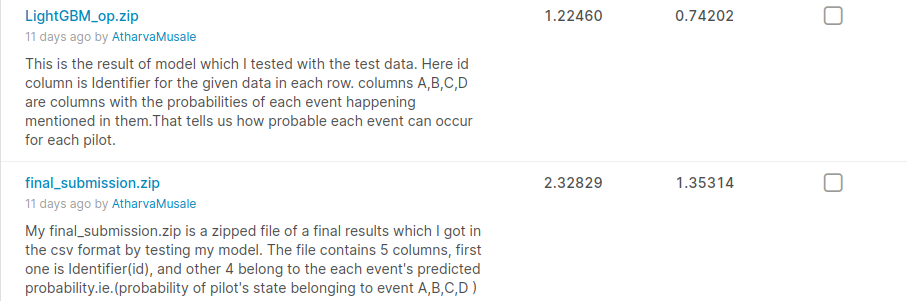